# Лабораторная работа № 4
## Щеглова П.Н.
1. Модифицировать (предложить собственные) два метода генерации псевдослучайных чисел.
2. Получить не менее 10 выборок каждым методом (диапозон чисел в каждой выборке не менее 10000) объемом не менее 50 элементов каждая.
3. Для каждой выборки посчитать среднее, отклонение и коэффициент вариации. Сделать вывод об однородности выборки.
4. Каждую выборку проверить на равномерность распределения и случайность, используя критерий Хи-квадрат.
5. Засечь время генерации чисел от тысячи до миллиона элементов обоими предложенными методами и любым стандартным методом используемого языка программирования. Построить графики сравнения скоростей в зависимости от объема выборки.
6. В отчете обязательно отразить: код алгоритма генерации и критерия проверки гипотезы, скриншот с результатами выполнения, анализ полученных результатов и выводы.

In [133]:
# линейный и кубический смешанный конгруэнтный метод

class Randomizer:
    def __init__(self, M, k, r, b):
        self.r = r
        self.M = M
        self.k = k
        self.b = b
        self.INDEX = 0

    def LCrand (self):
        if self.INDEX == 0:
            self.INDEX += 1
            return self.r
        else:
            self.r = (self.k*self.r - self.b)%self.M
            self.INDEX += 1
            return self.r

    def CCrand(self):
        if self.INDEX == 0:
            self.INDEX += 1
            return self.r
        else:
            self.r = (self.k[2]*self.r**3 - self.k[1]*self.r**2 + self.k[0]*self.r-self.b)%self.M
            self.INDEX += 1
            return self.r

r = 7
M = 2**32
k = 134775813
b = 1
LCrand = Randomizer(M, k, r, b)
LCrand.LCrand() # не включаем в выборку первое число r0
k = [13, 37, 4781]
CCrand = Randomizer(M, k, r, b)
CCrand.CCrand() # не включаем в выборку первое число r0

7

In [116]:
"""@package docstring
In this module quick sorting algorithm is formed as a functional module. Const function.
"""
import random

def quicksort(nums):
    if len(nums) <= 1:
        return nums
    else:
        q = random.choice(nums)
        s_nums = []
        b_nums = []
        e_nums = []
        for n in nums:
            if n < q:
                s_nums.append(n)
            elif n > q:
                b_nums.append(n)
            else:
                e_nums.append(n)
        return quicksort(s_nums) + e_nums + quicksort(b_nums)

In [134]:
dims = [50, 100, 200, 500, 1000, 5000, 10000, 50000, 100000, 200000]
samples_CC = [[],[],[],[],[],[],[],[],[],[]]
for  i in range(len(dims)):
    for j in range(dims[i]):
        samples_CC[i].append(CCrand.CCrand())

In [118]:
dims = [50, 100, 200, 500, 1000, 5000, 10000, 50000, 100000, 200000]
samples_LC = [[],[],[],[],[],[],[],[],[],[]]
for  i in range(len(dims)):
    for j in range(dims[i]):
        samples_LC[i].append(LCrand.LCrand())

$\bar{X} = \dfrac{1}{n}\sum_{i=1}^n X_i $ - выборочное среднее

$\sigma^2 = \hat{\mu}_2 = \dfrac{1}{n} \sum_{i=1}^n (X_i-\bar{X})^2$ - выборочная дисперсия

Так как $E\hat{\mu}_2 = \dfrac{n-1}{n}\mu_2$, если бы вместо выборочной дисперсии в качестве оценки для теоритической дисперсии мы взяли статистику следующего вида:
$$ S_0^2 = \dfrac{1}{n-1} \sum_{i=1}^n (X_i - \bar{X})^2 $$
то данная оценка была бы не только состоятельной, но и несмещенной для $\mu_2$.

Стандартное отклонение - оценка среднеквадратического отклонения случайной величины относительно ее математического ожидания на основе несмещенной оценки ее дисперсии:

$$ s = \sqrt{\dfrac{n}{n-1}\sigma^2} $$

In [136]:
from functools import reduce
# Выборочное среднее
def sample_mean(sample, dim):
    return reduce(lambda a,b : a+b, sample)/dim
means_LC = []
means_CC = []
for  i in range(len(dims)):
    means_LC.append(sample_mean(samples_LC[i], dims[i]))
    means_CC.append(sample_mean(samples_CC[i], dims[i]))

In [146]:
print([mean/M for mean in means_LC], [mean/M for mean in means_CC])

[0.44832751588430253, 0.493263272405602, 0.5263731005834416, 0.5023144444758072, 0.506859704923816, 0.49882600219566375, 0.5003995250688866, 0.5009383782576398, 0.4991587003164366, 0.49958367266584186] [0.5388616192666814, 0.5346039833454416, 0.5421039833454415, 0.5421039833454415, 0.5421039833454415, 0.5421039833454415, 0.5421039833454415, 0.5421039833454415, 0.5421039833454415, 0.5421039833454415]


In [137]:
import numpy as np
# выборочное отклонение
def sample_diver(sample, mean, dim):
    return (np.sum([(sample[i] - mean)**2 for i in range(dim)])/(dim))**(1/2)
diver_LC = []
standart_diver_LC = []
diver_CC = []
standart_diver_CC = []
for  i in range(len(dims)):
    diver_LC.append(sample_diver(samples_LC[i], means_LC[i], dims[i])) #sigma
    standart_diver_LC.append(sample_diver(samples_LC[i], means_LC[i], dims[i]-1)) #s
    diver_CC.append(sample_diver(samples_CC[i], means_CC[i], dims[i])) #sigma
    standart_diver_CC.append(sample_diver(samples_CC[i], means_CC[i], dims[i]-1)) #s

In [143]:
print([diver/M for diver in diver_LC], [diver/M for diver in diver_CC])

[0.27659399686401637, 0.29016729098939636, 0.28456332044595756, 0.2860130098217305, 0.28871319550103614, 0.2929256627277301, 0.2887254222247786, 0.2884369888021048, 0.2899065922864027, 0.2891491901335203] [0.28463608203961105, 0.09461612856738562, 0.05269564676564187, 0.052695646765641875, 0.052695646765641875, 0.05269564676564187, 0.052695646765641875, 0.052695646765641875, 0.052695646765641875, 0.05269564676564188]


Предварительная оценка однородности совокупности выполняется на основе коэффициента вариации: $ v_\sigma = \dfrac{\sigma}{\bar{X}} $. Если $ v_\sigma \leq 33\%$ , то совокупность является однородной.


In [138]:
v_sigma_LC = [standart_diver_LC[i]/means_LC[i]*100 for i in range(len(means_LC))]
v_sigma_CC = [standart_diver_CC[i]/means_CC[i]*100 for i in range(len(means_CC))]
print(v_sigma_LC, '\n', v_sigma_CC)

[61.95853619435123, 58.771944185522706, 54.121937778326725, 56.95371373380858, 56.933237318531916, 58.72888091622153, 57.70053388332597, 57.578805065463534, 58.07933255886738, 57.8777762620925] 
 [53.3577312063396, 17.751484311944036, 9.720579148016137, 9.720579148016139, 9.720579148016139, 9.720579148016137, 9.720579148016139, 9.720579148016139, 9.720579148016139, 9.72057914801614]


Сформулируем гипотезу $H_{0}$ и $H_1$: 
Пусть дана выборка $X = (X_1 \ldots X_n)$ из распределения $\mathcal{L}(\xi)$ и $F_\xi$ - неизвестное распределение.

1. $H_0 : F_\xi = UNIFORM(x, loc = 0, scale = M)$ - простая гипотеза, $UNIFORM$ - равномерное распределение
2. $H_1$ : не $UNIFORM(x, loc = 0, scale = M)$

Для проверки гипотезы $H_{0}$ воспользуемся критерием Пирсона (хи-квадрат). Для каждой выборки объемов $dims$ найдем значение критерия, границу критического множества для уровня значимости $\alpha=0.1$ и $\alpha=0.05$. В каждом случае возьмем $N=15$. Разделим каждую выборку на равновероятностные интервалы $np.arange(0.01, 1, 1/15)$, в случае если взятый интервал меньше, чем 1, он склеивается со следующим.

Граница уровня значимости $\alpha$ - это есть ни что иное, как $1-\alpha$-квантиль распределения $\chi^2(N-1)$

Статистика критерия согласия $\chi ^{2}$ Пирсона определяется соотношением:
$$\chi ^{2} = n \sum_{i=1}^{N}\dfrac{(n_i/n - P(\theta))^2}{P(\theta)}  $$


In [139]:
from scipy.stats import uniform, chi2
import pandas as pd

M = 2**32

def counter(array, num1, num2):
    '''
    this function counts how many numbers in the array are in specified range [num1; num2).
    '''
    count = 0
    for i in range(len(array)):
        if array[i] < num2 and array[i] >= num1:
            count += 1
    return count

def compute_quantile(df_, alpha_):
    '''
    this function computes the chi square distribution quantile of the level alpha_.
    '''
    return np.quantile(chi2.rvs(df_, size=100000), 1-alpha_)

def compute_crit(sample, cdf, param, dim, value1, value2):
    '''
    this function computes the criterion value.
    '''
    sum_cdf = 0
    for i in np.arange(value1, value2, (value2-value1)/2):
        sum_cdf += cdf(i, scale = param)
    return (counter(sample, value1, value2)/dim-sum_cdf)**2/sum_cdf

def chi2_check(arrays, cdf, param, dims, values):
    '''
    this function using the chi square criterion shows if H0 hypothesis is accepted or not for each sample.
    '''
    for j in range(len(arrays)):
        print(f"                              Выборка размера {dims[j]}                                  ")
        array_ = quicksort(arrays[j])
        crit_sum = 0
        nvalues = len(values)
        for k in range(1, nvalues):
            crit_sum += (compute_crit(array_, cdf, param, dims[j], values[k-1], values[k]))
        quantile01 = compute_quantile((nvalues-1),0.1)
        quantile005 = compute_quantile((nvalues-1),0.05)
        if(crit_sum<quantile01):
            answ01 = "H0 принимается;"
        else:
            answ01 = "H0 отклоняется;"
        if(crit_sum<quantile005):
            answ005 = "H0 принимается;"
        else:
            answ005 = "H0 отклоняется;"
        print(f"Значение критерия: {crit_sum:.4}, ",
              f"\n\tДля уровня 0.1, граница {quantile01:.4}: ", answ01,
              f" Для уровня 0.05, граница {quantile005:.4} ", answ005)
    print('='*100)
        
values = []
for alpha in np.arange(0.01, 1, 1/15):
    values.append(uniform.ppf(alpha, scale = M))
values = pd.Series(values).unique()

print(f"                              Выборка LC                                  ")
chi2_check(samples_LC, uniform.cdf, M, dims, values)
print(f"                              Выборка CC                                  ")
chi2_check(samples_CC, uniform.cdf, M, dims, values)

                              Выборка LC                                  
                              Выборка размера 50                                  
Значение критерия: 11.19,  
	Для уровня 0.1, граница 21.01:  H0 принимается;  Для уровня 0.05, граница 23.68  H0 принимается;
                              Выборка размера 100                                  
Значение критерия: 11.14,  
	Для уровня 0.1, граница 21.06:  H0 принимается;  Для уровня 0.05, граница 23.73  H0 принимается;
                              Выборка размера 200                                  
Значение критерия: 11.23,  
	Для уровня 0.1, граница 21.06:  H0 принимается;  Для уровня 0.05, граница 23.78  H0 принимается;
                              Выборка размера 500                                  
Значение критерия: 11.18,  
	Для уровня 0.1, граница 21.13:  H0 принимается;  Для уровня 0.05, граница 23.71  H0 принимается;
                              Выборка размера 1000                                  
З

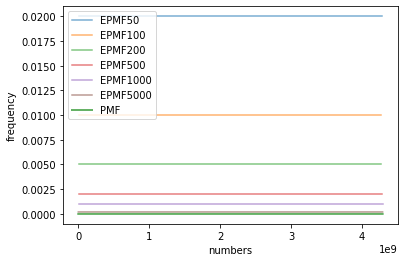

In [150]:
#построим полигоны частот для первых 6-ти выборок и сравним с теор. частотами (равными)
import matplotlib.pyplot as plt

def simple_counter(array, num):
    '''
    this function counts how many numbers in the array are equal to num. Linear complexity.
    '''
    count = 0
    for i in range(len(array)):
        if int(array[i]) == int(num):
            count += 1

    return count
    
fig, ax = plt.subplots(1,1)
for i in range(len(dims[:6])):
    xs = np.unique(samples_LC[i])
    y = []
    for number in xs:
        y.append(simple_counter(samples_LC[i], number)/dims[i])
    plt.xlabel('numbers')
    plt.ylabel('frequency')
    ax.plot(xs, y, alpha=0.6, label='EPMF{h}'.format(h=dims[i]))
ax.plot(xs, uniform.pdf(xs, scale = M), 'g', lw=2, alpha=0.6, label='PMF')
ax.legend(loc='upper left', frameon=True)
plt.show()

In [147]:
"""@package docstring
In this module all algorithms are timed.
"""
import timeit
import time

def CCrand_time(dim):
    """
* @dim - размер массива для генерации.
* @start - время начала замера времени.
* @end - время конца замера времени.
* @repeats - количество повторений замера времени.
* @total_time - суммарное время выполнения всех повторений.
* @return среднее замеров времени.
    """
    repeats = 10
    total_time = 0
    for repeat in range(repeats):
        start = time.clock()
        for i in range(dim):
            CCrand.CCrand()
        end = time.clock()
        total_time += abs(end - start)
    return total_time/repeats

def LCrand_time(dim):
    """
* @dim - размер массива для генерации.
* @start - время начала замера времени.
* @end - время конца замера времени.
* @repeats - количество повторений замера времени.
* @total_time - суммарное время выполнения всех повторений.
* @return среднее замеров времени.
    """
    repeats = 10
    total_time = 0
    for repeat in range(repeats):
        start = time.clock()
        for i in range(dim):
            LCrand.LCrand()
        end = time.clock()
        total_time += abs(end - start)
    return total_time/repeats

def py_rand_time(dim):
    """
* @dim - размер массива для генерации.
* @start - время начала замера времени.
* @end - время конца замера времени.
* @repeats - количество повторений замера времени.
* @total_time - суммарное время выполнения всех повторений.
* @return среднее замеров времени.
    """
    repeats = 10
    total_time = 0
    for repeat in range(repeats):
        start = time.clock()
        uniform.rvs(scale = M, size=dim)
        end = time.clock()
        total_time += abs(end - start)
    return total_time/repeats

time_dims = np.linspace(1000, 1000000, num=10, dtype=int)
CCrand_t = []
LCrand_t = []
py_rand_t = []

for i in range(10):
    CCrand_t.append(CCrand_time(time_dims[i]))
    LCrand_t.append(LCrand_time(time_dims[i]))
    py_rand_t.append(py_rand_time(time_dims[i]))

C:\Users\polin\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
C:\Users\polin\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
C:\Users\polin\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
C:\Users\polin\Anaconda3\lib\site-packages\ipykernel_launcher.py:41: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
C:\Users\polin\Anaconda3\lib\site-packages\ipykernel_launcher.py:57: DeprecationWarning: time.clock has been dep

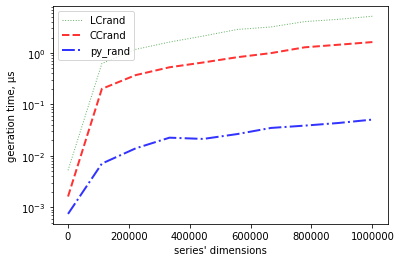

In [148]:
"""@package docstring
In this module graph is created to visualy compare the speed difference between random generation algorithms. Log scale.
"""
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(1,1, 1)

plt.plot(time_dims, CCrand_t, ':g', lw=1, alpha=0.6, label='LCrand')
plt.plot(time_dims, LCrand_t, '--r', lw=2, alpha=0.8, label='CCrand')
plt.plot(time_dims, py_rand_t, '-.b', lw=2, alpha=0.8, label='py_rand')
plt.legend(loc='upper left', frameon=True)
plt.xlabel('series\' dimensions')
plt.ylabel('geeration time, µs')
ax.set_yscale('log')
plt.show()